<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


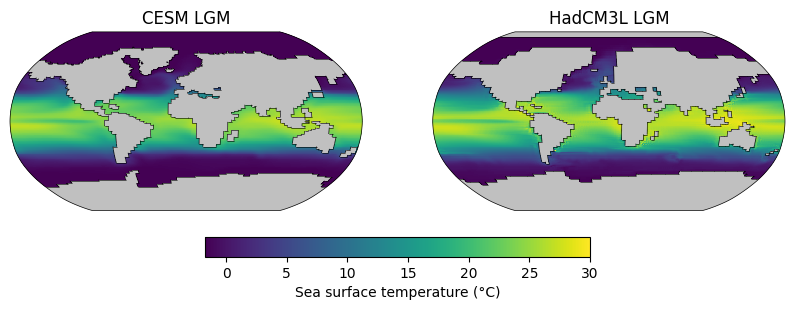

In [1]:
from cgeniepy.array import GriddedData
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

cesm_lgm = xr.load_dataset("/Users/yingrui/cgeniepy/examples/CESM_LGM_var_regrid.nc")
cesm_temp = GriddedData(cesm_lgm['TEMP'], mutable=False, attrs=cesm_lgm['TEMP'].attrs)

hadcm3_lgm=  xr.load_dataset("/Users/yingrui/cgeniepy/examples/teitu_020_o.pgclann.nc", decode_times=False)
hadcm3_temp = GriddedData(hadcm3_lgm['temp_ym_dpth'], mutable=False, attrs=hadcm3_lgm['temp_ym_dpth'].attrs)

fig, axs = plt.subplots(1, 2, figsize=(10, 5), subplot_kw={'projection': ccrs.Robinson()})

p = cesm_temp.isel(time=0,z_t=0).to_GriddedDataVis()
p.aes_dict['pcolormesh_kwargs']['vmax'] = 30
p.plot(ax=axs[0], outline=True, colorbar=False)
axs[0].set_title('CESM LGM')

p2 = hadcm3_temp.isel(t=0,depth_1=0).to_GriddedDataVis()
p2.aes_dict['pcolormesh_kwargs']['vmax'] = 30
im = p2.plot(ax=axs[1], outline=True, colorbar=False)
axs[1].set_title('HadCM3L LGM')

fig.colorbar(im, ax=axs, orientation='horizontal', label='Sea surface temperature (°C)', fraction=0.05, pad=0.07)
fig.savefig('../publication/fig2.png', dpi=300, bbox_inches='tight')

In [10]:
files("data").joinpath("colormaps").glob("*")

<generator object Path.glob at 0x32c2c5e00>

<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
/Users/yingrui/cgeniepy/src/cgeniepy/model.py:48: UserWarning: No gemflag is provided, use default gemflags: [biogem]
  warnings.warn("No gemflag is provided, use default gemflags: [biogem]")


(0, 1)
(0, 1)
(0, 1)


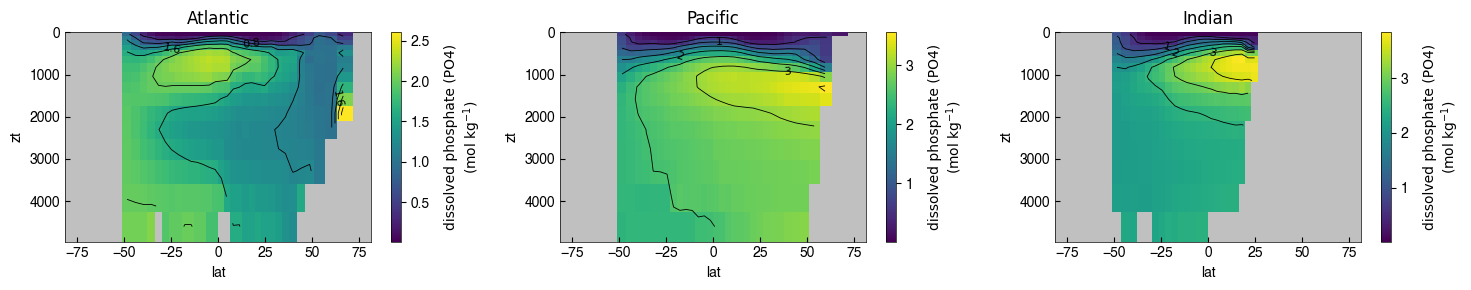

In [1]:
from cgeniepy.model import GenieModel
import matplotlib.pyplot as plt

model = GenieModel("/Users/yingrui/Science/lgm_foram_niche/model/muffin.CBE.worlg4.BASESFeTDTL.SPIN")
ocn_po4 = model.get_var("ocn_PO4").isel(time=-1)

fig, axs=plt.subplots(nrows=1, ncols=3, figsize=(15, 3), tight_layout=True)        

basins = ['Atlantic', 'Pacific', 'Indian']

for i in range(3):
	basin_data = model.get_var('ocn_PO4').isel(time=-1).mask_basin(base='worjh2',basin=basins[i], subbasin='')
	basin_data.data.values = basin_data.data.values * 1E6
	basin_data.mean(dim='lon').plot(ax=axs[i], contour=True)
	axs[i].title.set_text(basins[i])

plt.show()        

In [7]:
from cgeniepy.array import GriddedData
import numpy as np
import xarray as xr

def create_testdata():
    lat = np.linspace(-89.5,89.5,180)
    lon = np.linspace(0,359,360)
    np.random.seed(12349)
    data = np.random.rand(lat.size,lon.size)
    ## create some nan

    xdata = xr.DataArray(data, coords=[('lat',lat),('lon',lon)],
                         attrs={'long_name':'random data', 'units':'uniteless'})   
    return GriddedData(xdata,False, attrs=xdata.attrs)

testdata = create_testdata()
testdata.mask_basin(base='worjh2', basin='Atlantic', subbasin='')

MaskError: Mask and data not compatible: data size is 64800, mask size is 1296.

In [34]:
testdata.sel_modern_basin(['NPO']).data

<xarray.DataArray (lat: 180, lon: 360)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Attributes:
    long_name:  random data
    units:      uniteless

/Users/yingrui/cgeniepy/src/cgeniepy/model.py:48: UserWarning: No gemflag is provided, use default gemflags: [biogem]
  warnings.warn("No gemflag is provided, use default gemflags: [biogem]")


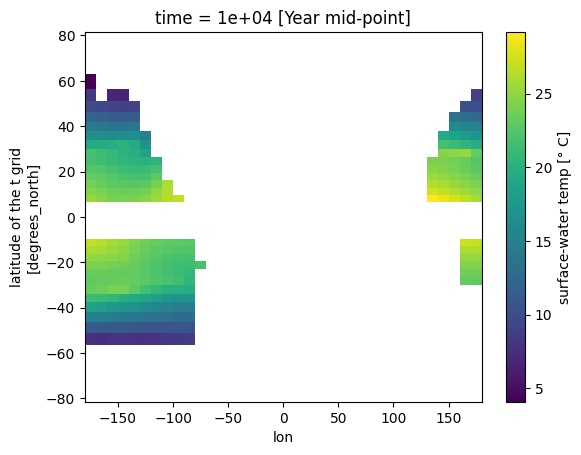

In [6]:
from cgeniepy.model import GenieModel

model = GenieModel("/Users/yingrui/Science/lgm_foram_niche/model/muffin.CBE.worlg4.BASESFeTDTL.SPIN")
sst = model.get_var('ocn_sur_temp').isel(time=-1)
sst.sel_modern_basin(['NPO','SPO']).data.plot()

In [2]:
import regionmask
pacific_mask = regionmask.defined_regions.ar6.ocean.map_keys([46,47])

total_ocn_mask = regionmask.defined_regions.ar6.ocean.mask(testdata.data)

NameError: name 'regionmask' is not defined

In [55]:
regionmask.defined_regions.ar6.ocean.map_keys('NPO')

47

In [ ]:
fig.savefig('cesm_hadcm3_lgm.png', dpi=300, bbox_inches='tight')

In [ ]:
test_cesm.isel(time=0,z_t=0).plot(outline=True, colorbar=True)

In [ ]:
test_hadcm3.isel(t=0,depth_1=0).plot(outline=False, colorbar=True)

In [ ]:
from cgeniepy.model import GenieModel

pi_model = GenieModel("/Users/yingrui/Science/lgm_foram_niche/model/muffin.CBE.worlg4.BASESFeTDTL.SPIN", gemflag='biogem')

pi_model.get_var("ocn_sur_temp").isel(time=-1).plot(outline=True)

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

fig, ax = plt.subplots(subplot_kw={"projection": ccrs.PlateCarree()})
test_cesm.isel(time=0,z_t=0).normalise_longitude(method='e2n').plot(cfeature="coastline", ax=ax)

In [ ]:
from cgeniepy.table import ScatterData

## Step 0 make sure Python and the package is installed
## type in terminal: pip install cgeniepy

## Step 1
## read in the observational data (can be csv, txt)
proxy_d13C = ScatterData("~/Science/lgm_bcp/data/LGM_d13c_CLEAN.txt", delimiter="\t", header=None)

## assign the column name skip if already provided 
proxy_d13C.data.columns = ["Longitude", "Latitude", "Depth", "d13C","Event"]

## tell the package the coordinate/variable columns
proxy_d13C.specify_cols({"lon": "Longitude",
                "lat": "Latitude",                
                "depth": "Depth"},
                var_col="d13C")

## Step 3
## start to look up the model one by one
## and store in the `model_data`
model_data = []
cesm_13C = GriddedData(cesm_lgm['CISO_DIC_d13C'], mutable=False, attrs=cesm_lgm['CISO_DIC_d13C'].attrs)
cesm_13C_last = cesm_13C.isel(time=-1)
for i in range(len(proxy_d13C.data)):
    lat = proxy_d13C.data[proxy_d13C.lat].iloc[i]
    lon = proxy_d13C.data[proxy_d13C.lon].iloc[i]
    zt = proxy_d13C.data[proxy_d13C.depth].iloc[i] * 100
    pos = (zt, lat, lon)
    
    v1 = cesm_13C_last.search_point(pos, ignore_na=True)

    model_data.append(v1)

## add the model data to the dataframe
proxy_d13C.data["model"] = model_data

In [ ]:
from cgeniepy.skill import DataFrameComp
DataFrameComp(proxy_d13C.data, 'model','d13C').plot()

In [ ]:
DataFrameComp(proxy_d13C.data, 'model','d13C').mscore()